In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas
import xarray
import h5py
import random

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

In [2]:
os.getenv('ENDPOINT_URL') 

'http://rook-ceph-rgw-nautiluss3.rook'

In [3]:
tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
#  If s3 isn't working, you will need to use a copy of the file on your own computer
# e.g.
#tbl_file = '/tank/xavier/Oceanography/AI/OOD/LLC/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_noise_modis2012.parquet


# Take a slice: 2.1 K < DT < 2.2 K 

In [4]:
llc_table['DT'] = llc_table.T90 - llc_table.T10
llc_table['DT_abs'] = llc_table.Tmax - llc_table.Tmin

In [5]:
temp_floor = (llc_table.T90 - llc_table.T10) > 2.1
temp_ceiling = (llc_table.T90 - llc_table.T10) < 2.2

sub_tbl = llc_table[ temp_floor & temp_ceiling ]

In [6]:
sub_tbl['DT'].head()

76     2.131998
79     2.150002
81     2.165001
383    2.182001
384    2.189001
Name: DT, dtype: float64

In [7]:
sub_tbl.shape

(4697, 28)

# Visualize 9 random cutouts

In [8]:
# pick 9 random cutouts

indices = random.sample( range(sub_tbl.shape[0]), 9)

nine_cutouts = sub_tbl.iloc[indices]
nine_cutouts

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_idx,lat,lon,row,col,datetime,filename,LL,DT,DT_abs
152351,9.080434,-90.992880,997,2012-03-13 08:00:00,223.951355,272,0.000000,23.228539,22.084000,25.356001,...,75203,9.078120,-90.989586,8360,14704,2012-03-13 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-13T12_00_...,263.635010,2.105000,3.272001
199714,29.212120,154.589460,837,2012-04-02 15:45:00,25.033813,165,0.049683,19.100906,17.433001,20.099001,...,537374,29.213974,154.593750,9479,9212,2012-04-02 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-02T12_00_...,53.160461,2.164000,2.666000
167917,8.454898,-87.450070,453,2012-03-19 07:20:00,47.559692,1680,0.000916,28.056835,25.646000,29.274000,...,317616,8.450695,-87.447914,8327,14874,2012-03-19 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-19T12_00_...,421.326660,2.132000,3.628000
183801,16.112349,41.391000,956,2012-03-25 23:10:00,126.349243,1536,0.049011,25.862698,24.013000,27.909000,...,358431,15.953089,41.197918,8727,3769,2012-03-26 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-26T00_00_...,-6.428040,2.159000,3.896000
577076,37.440773,131.848660,293,2012-10-15 16:55:00,-95.614929,749,0.049988,21.504704,19.673000,23.223000,...,131686,37.445839,131.843750,9993,8120,2012-10-15 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-10-15T12_00_...,-175.275879,2.102999,3.549999
303988,-28.229841,110.477230,389,2012-05-27 17:45:00,74.594666,528,0.000000,21.730202,20.308001,23.224001,...,617884,-28.222572,110.468750,6355,7094,2012-05-28 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-05-28T00_00_...,-142.536255,2.139000,2.916000
344765,-35.244022,-34.155872,977,2012-06-20 03:45:00,8.832581,928,0.049133,17.569973,16.005001,18.586000,...,542768,-35.246475,-34.156250,5924,152,2012-06-20 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-06-20T00_00_...,141.774109,2.151999,2.580999
349779,44.428474,36.175610,837,2012-06-21 23:55:00,-264.611786,48,0.048706,21.806381,18.366001,22.984001,...,226376,44.426941,36.177082,10472,3528,2012-06-22 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-06-22T00_00_...,-139.546204,2.196001,4.618000
45018,33.668274,-160.330250,869,2012-01-25 12:50:00,40.552795,80,0.032349,17.025618,15.561001,18.420000,...,190185,33.662819,-160.322922,9751,11376,2012-01-25 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-25T12_00_...,-4.607788,2.101002,2.858999


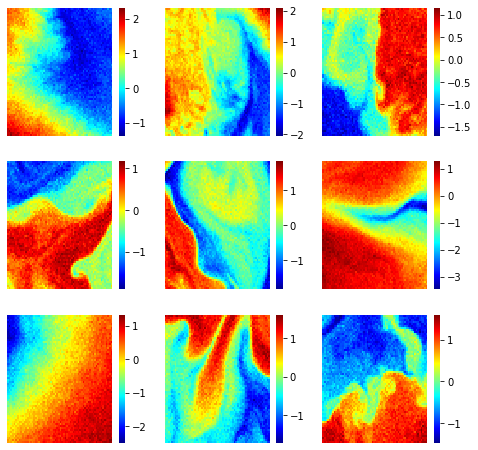

In [9]:
# plot these 9 cutouts side by side (3x3)

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( nine_cutouts.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Take another DT slice : 1.1 K < DT < 1.2 K

In [10]:
temp_floor1 = (llc_table.T90 - llc_table.T10) > 1.1
temp_ceiling1 = (llc_table.T90 - llc_table.T10) < 1.2

sub_tbl1 = llc_table[ temp_floor1 & temp_ceiling1 ]

In [11]:
sub_tbl1['DT'].head()

3     1.102000
9     1.115000
51    1.143000
58    1.178000
61    1.111001
Name: DT, dtype: float64

In [12]:
sub_tbl1.shape

(23556, 28)

# Look at these 9 random cutouts

In [13]:
indices1 = random.sample( range(sub_tbl1.shape[0]), 9)

nine_cutouts1 = sub_tbl1.iloc[indices1]
nine_cutouts1

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_idx,lat,lon,row,col,datetime,filename,LL,DT,DT_abs
419916,35.869755,14.173094,549,2012-07-30 00:55:00,110.567261,1808,0.048950,25.324383,24.228001,26.302000,...,373083,35.871922,13.552083,9891,2442,2012-07-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-30T00_00_...,397.376770,1.126001,2.073999
8543,25.092567,-83.521034,633,2012-01-06 07:25:00,-248.619171,96,0.049438,23.112326,21.338001,24.435001,...,504237,25.090614,-83.531250,9237,15062,2012-01-06 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-06T12_00_...,208.605896,1.158001,3.097000
237130,-16.045141,9.460398,485,2012-04-22 00:40:00,198.650818,1424,0.023376,23.319878,22.321001,24.178001,...,320885,-16.045248,9.468750,7043,2246,2012-04-22 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-22T00_00_...,569.897583,1.134001,1.857000
24145,-43.458070,-49.613045,577,2012-01-15 04:20:00,393.285889,128,0.048340,17.527828,15.698000,18.537001,...,343559,-43.463352,-49.614582,5372,16690,2012-01-15 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-15T00_00_...,100.654541,1.192001,2.839001
245858,14.919109,-102.940290,325,2012-04-26 08:20:00,98.363342,1901,0.002747,28.133615,26.821001,28.768002,...,198031,14.917870,-102.947914,8671,14130,2012-04-26 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-26T12_00_...,392.729492,1.139000,1.947001
550658,-42.849850,-59.344753,965,2012-10-03 05:20:00,113.200989,688,0.008301,6.583041,5.369000,7.475000,...,141346,-42.855682,-59.343750,5415,16223,2012-10-03 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-10-03T00_00_...,363.028625,1.110000,2.106000
74213,-34.369804,-94.976620,549,2012-02-09 07:25:00,478.888489,1872,0.000000,20.528223,19.729000,21.347000,...,68473,-34.363136,-94.968750,5980,14513,2012-02-09 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-02-09T12_00_...,517.237488,1.191999,1.618000
189471,27.361519,130.241840,485,2012-03-28 17:05:00,-8.369324,534,0.049683,20.416397,19.959999,21.644001,...,560973,27.358278,130.239578,9369,8043,2012-03-28 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-28T12_00_...,204.307007,1.179001,1.684002
627701,-29.378940,41.173157,965,2012-11-10 22:45:00,-62.068237,1364,0.047729,20.879192,19.784000,22.170002,...,260525,-29.381096,41.177082,6286,3768,2012-11-11 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-11-11T00_00_...,173.488770,1.144001,2.386002


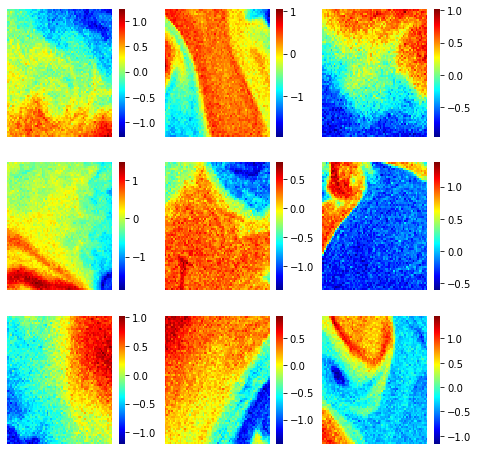

In [14]:
# plot these 9 cutouts side by side (3x3)

fig1, axes1 = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes1[row, col]
   
        img = llc_io.grab_image( nine_cutouts1.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()

# Select Low LL and specific DT range Data

In [5]:
low_LL = llc_table.LL < -1000
temp_floor2 = (llc_table.T90 - llc_table.T10) > 3.1
temp_ceiling2 = (llc_table.T90 - llc_table.T10) < 3.2

sub_tbl2 = llc_table[low_LL& temp_floor2 & temp_ceiling2 ]

In [6]:
sub_tbl2.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_idx,lat,lon,row,col,datetime,filename,LL,DT,DT_abs
55079,44.734093,-49.148567,805,2012-01-31 05:30:00,-55.786987,1901,0.026062,2.649482,0.287999,10.407,...,82674,44.731190,-49.156250,10494,16712,2012-01-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,-1758.781006,3.192000,10.119000
194207,38.159103,156.697190,197,2012-03-30 15:10:00,89.354431,912,0.000366,12.934269,9.331000,14.783,...,480574,38.160866,156.697922,10040,9313,2012-03-30 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-30T12_00_...,-1057.123779,3.135000,5.452000
194542,-37.406270,-52.598972,684,2012-03-31 04:40:00,-125.479919,1631,0.049377,18.218052,14.062000,23.737,...,166078,-37.399982,-52.593750,5785,16547,2012-03-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-31T00_00_...,-1565.794800,3.188999,9.674999
226412,42.595566,-55.303654,869,2012-04-16 06:00:00,-586.851929,328,0.049927,11.340374,6.186000,15.316,...,566241,42.599674,-55.302082,10342,16417,2012-04-16 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-16T00_00_...,-1225.503906,3.195000,9.130000
236983,39.607124,148.130540,678,2012-04-21 16:10:00,-101.882324,1471,0.049500,11.833742,2.316000,13.882,...,99603,39.601162,148.135422,10136,8902,2012-04-21 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-21T12_00_...,-7940.899414,3.192000,11.566000


In [7]:
sub_tbl2.shape

(11, 28)

## Heat Map vs Contour Map

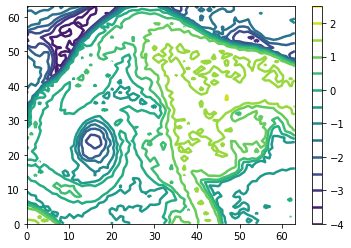

In [8]:
cutout = sub_tbl2.iloc[1]

img = llc_io.grab_image(cutout)

#Find number of contour levels to draw
lvls = int(cutout.DT_abs // 0.5) + 1

# l = cs.levels

# Create list of contour values
# Round values to the nearest 0.5
aT_min = round( np.min(img)*2 )/2
aT_max = aT_min + 0.5*lvls

contour_values = np.arange(aT_min, aT_max, 0.5)

#Contour map
plt.contour(img, levels = lvls, linewidths = 2.5)
plt.colorbar()
plt.show()

<AxesSubplot:>

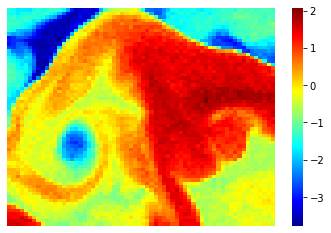

In [9]:
ulmo_plotting.show_image(img)

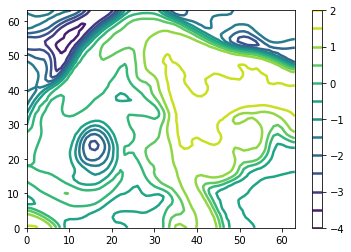

In [10]:
from scipy.ndimage.filters import gaussian_filter

#chosen by appearance, sigma = 1 looks good 
img_g = gaussian_filter(img, sigma = 1)

#Contour map
cs = plt.contour(img_g, levels = lvls, linewidths = 2.5)
plt.colorbar()
plt.show()

#### Obtain a contour line as numpy array

In [11]:
p1 = cs.collections[2].get_paths()
p1_array = p1[0].vertices

p2 = cs.collections[3].get_paths()
p2_array = p2[0].vertices

#### Visualize the contour line on scatter plot

(0.0, 64.0)

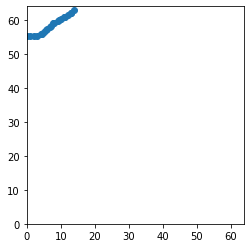

In [12]:
plt.scatter(p2_array[:,0], p2_array[:,1])
plt.axis('square')
plt.xlim(0, 64)
plt.ylim(0, 64)

In [13]:
list(p2[0].iter_segments())

# - ``MOVETO`` :  1 vertex
        #Pick up the pen and move to the given vertex.

# - ``LINETO`` :  1 vertex
       # Draw a line from the current position to the given vertex.

[(array([ 0.        , 55.30890974]), 1),
 (array([ 1.        , 55.25736218]), 2),
 (array([ 2.        , 55.18492906]), 2),
 (array([ 3.        , 55.33939198]), 2),
 (array([ 4.       , 55.7829691]), 2),
 (array([ 4.36023643, 56.        ]), 2),
 (array([ 5.       , 56.3683666]), 2),
 (array([ 5.68574889, 57.        ]), 2),
 (array([ 6.        , 57.28011078]), 2),
 (array([ 6.6597527, 58.       ]), 2),
 (array([ 7.        , 58.32025486]), 2),
 (array([ 7.79435423, 59.        ]), 2),
 (array([ 8.        , 59.15011906]), 2),
 (array([ 9.        , 59.80993591]), 2),
 (array([ 9.31877782, 60.        ]), 2),
 (array([10.        , 60.35147211]), 2),
 (array([11.        , 60.83472391]), 2),
 (array([11.271348, 61.      ]), 2),
 (array([12.        , 61.43190884]), 2),
 (array([12.83049977, 62.        ]), 2),
 (array([13.       , 62.1497585]), 2),
 (array([13.77728272, 63.        ]), 2)]

<AxesSubplot:>

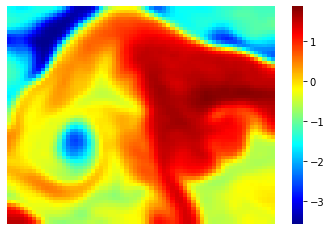

In [14]:
ulmo_plotting.show_image(img_g)

In [15]:
from scipy.interpolate import UnivariateSpline
import numpy as np

def curvature_splines(x, y=None, error=0.1):
    """Calculate the signed curvature of a 2D curve at each point
    using interpolating splines.
    Parameters
    ----------
    x,y: numpy.array(dtype=float) shape (n_points, )
         or
         y=None and
         x is a numpy.array(dtype=complex) shape (n_points, )
         In the second case the curve is represented as a np.array
         of complex numbers.
    error : float
        The admisible error when interpolating the splines
    Returns
    -------
    curvature: numpy.array shape (n_points, )
    Note: This is 2-3x slower (1.8 ms for 2000 points) than `curvature_gradient`
    but more accurate, especially at the borders.
    """

    # handle list of complex case
    if y is None:
        x, y = x.real, x.imag

    t = np.arange(x.shape[0])
    std = error * np.ones_like(x)

    fx = UnivariateSpline(t, x, k=4, w=1 / np.sqrt(std))
    fy = UnivariateSpline(t, y, k=4, w=1 / np.sqrt(std))

    xˈ = fx.derivative(1)(t)
    xˈˈ = fx.derivative(2)(t)
    yˈ = fy.derivative(1)(t)
    yˈˈ = fy.derivative(2)(t)
    curvature = (xˈ* yˈˈ - yˈ* xˈˈ) / np.power(xˈ** 2 + yˈ** 2, 3 / 2)
    return curvature

In [16]:
k = curvature_splines(p1_array[:, 0], p1_array[:, 1])

In [17]:
k

array([ 0.16129416,  0.13464837,  0.10879186,  0.0859429 ,  0.06658937,
        0.05044769,  0.03704366,  0.02599405,  0.0171254 ,  0.01051111,
        0.0064514 ,  0.00538622,  0.00772227,  0.01357831,  0.02250873,
        0.03333112,  0.04420828,  0.04913668,  0.04602403,  0.03856201,
        0.02934093,  0.01957684,  0.0093404 , -0.00231124, -0.01771477,
       -0.04033215, -0.0784907 , -0.15660419, -0.34794011, -0.83529878,
       -1.59045384, -1.35524925, -0.63460282, -0.28694843, -0.14853243,
       -0.08923592, -0.06446206, -0.05700748, -0.05951817, -0.06996205,
       -0.08688011, -0.10965902, -0.1380802 , -0.16944686, -0.19696407,
       -0.21031117, -0.20074998, -0.17120508, -0.13423041, -0.09857649,
       -0.06836072, -0.04428299, -0.02542948, -0.01040363,  0.00220546,
        0.01373747,  0.02557508,  0.03941145,  0.0577545 ,  0.08494457,
        0.12936912,  0.20837348])

In [ ]:
ds = xarray.load_dataset( ulmo_io.open( cutout.filename, 'rb') )
ds